In [88]:
from pathlib import Path

from dask import dataframe as dd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pearl.post_processing.bmi import calc_risk_by_group, clean_control, group_title_dict


In [89]:
num_samples = 2000
baseline = Path("/workspaces/pearlModel/out/200_rep_3/S0_200/combined")
variable = Path("/workspaces/pearlModel/out/200_rep_3/S3_200/combined")
baseline_sa = Path("/workspaces/pearlModel/out/200_rep_3/S0_SA_200/combined")
variable_sa = Path("/workspaces/pearlModel/out/200_rep_3/S3_SA_200/combined")

#baseline = Path("/workspaces/pearlModel/out/S0_10/combined")
#variable = Path("/workspaces/pearlModel/out/S3_10/combined")
#baseline_sa = Path("/workspaces/pearlModel/out/S0_SA_10/combined")
#variable_sa = Path("/workspaces/pearlModel/out/S3_SA_10/combined")

In [90]:
param_df_baseline = pd.read_parquet(baseline / "parameters.parquet").reset_index(drop=True)
param_df_variable = pd.read_parquet(variable / "parameters.parquet").reset_index(drop=True)
param_df_baseline_sa = pd.read_parquet(baseline_sa / "parameters.parquet").reset_index(drop=True)
param_df_variable_sa = pd.read_parquet(variable_sa / "parameters.parquet").reset_index(drop=True)

In [91]:
param_df_baseline_sa.columns

Index(['replication', 'group', 'new_dx', 'final_year', 'mortality_model',
       'mortality_threshold_flag', 'idu_threshold', 'seed',
       'bmi_intervention_scenario', 'bmi_intervention_start_year',
       'bmi_intervention_end_year', 'bmi_intervention_coverage',
       'bmi_intervention_effectiveness', 'prev_users_dict_hcv',
       'prev_users_dict_smoking', 'prev_users_dict_anx', 'prev_users_dict_dpr',
       'prev_users_dict_ckd', 'prev_users_dict_lipid', 'prev_users_dict_dm',
       'prev_users_dict_ht', 'prev_users_dict_malig', 'prev_users_dict_esld',
       'prev_users_dict_mi', 'prev_inits_dict_hcv', 'prev_inits_dict_smoking',
       'prev_inits_dict_anx', 'prev_inits_dict_dpr', 'prev_inits_dict_ckd',
       'prev_inits_dict_lipid', 'prev_inits_dict_dm', 'prev_inits_dict_ht',
       'prev_inits_dict_malig', 'prev_inits_dict_esld', 'prev_inits_dict_mi',
       'sa_incidence_scalar_dm', 'pre_art_bmi', 'post_art_bmi',
       'art_initiators'],
      dtype='object')

### First lets look at the differences between the sensitivity analysis run and the unaltered runs in the S0 scenario

In [92]:
# load the baseline data
bmi_int_dm_prev_baseline = dd.read_parquet(baseline / "dm_final_output.parquet")
bmi_int_dm_prev_baseline_sa = dd.read_parquet(baseline_sa / "dm_final_output.parquet")

# clean to control specifications
control_bmi_int_dm_prev_baseline = clean_control(bmi_int_dm_prev_baseline, only_eligible=True, only_received=True)
control_bmi_int_dm_prev_baseline_sa = clean_control(bmi_int_dm_prev_baseline_sa, only_eligible=True, only_received=True)

# filter for only people eligible for intervention
bmi_int_eligible_risk_baseline = calc_risk_by_group(control_bmi_int_dm_prev_baseline, 7).compute()
bmi_int_eligible_risk_baseline_sa = calc_risk_by_group(control_bmi_int_dm_prev_baseline_sa, 7).compute()

In [93]:
baseline_risk_median = bmi_int_eligible_risk_baseline.groupby('group')['risk'].median().reset_index()
baseline_risk_median

,group,risk
0,het_black_female,24.118552
1,het_black_male,18.231133
2,het_hisp_female,21.544147
3,het_hisp_male,18.534267
4,het_white_female,22.100107
5,het_white_male,16.845259
6,idu_black_female,26.614157
7,idu_black_male,14.753715
8,idu_hisp_female,28.284753
9,idu_hisp_male,9.444270


In [94]:
baseline_risk_sa_median = bmi_int_eligible_risk_baseline_sa.groupby('group')['risk'].median().reset_index()
baseline_risk_sa_median

,group,risk
0,het_black_female,23.253197
1,het_black_male,19.754515
2,het_hisp_female,21.469776
3,het_hisp_male,19.322767
4,het_white_female,21.981445
5,het_white_male,19.298257
6,idu_black_female,27.024333
7,idu_black_male,15.643045
8,idu_hisp_female,28.782257
9,idu_hisp_male,9.627168


In [95]:
((baseline_risk_sa_median['risk'] - baseline_risk_median['risk']) / baseline_risk_median['risk']) * 100

0     -3.587920
1      8.355938
2     -0.345206
3      4.254284
4     -0.536929
5     14.561951
6      1.541194
7      6.027842
8      1.758911
9      1.936601
10    -2.582033
11     5.476647
12    -3.377275
13    -3.001693
14    -1.255196
Name: risk, dtype: float64

### Let's do the same for the intervention run

In [96]:
# load the variable data
bmi_int_dm_prev_variable = dd.read_parquet(variable / "dm_final_output.parquet")
bmi_int_dm_prev_variable_sa = dd.read_parquet(variable_sa / "dm_final_output.parquet")

# clean to control specifications
control_bmi_int_dm_prev_variable = clean_control(bmi_int_dm_prev_variable, only_eligible=True, only_received=True)
control_bmi_int_dm_prev_variable_sa = clean_control(bmi_int_dm_prev_variable_sa, only_eligible=True, only_received=True)

# filter for only people eligible for intervention
bmi_int_eligible_risk_variable = calc_risk_by_group(control_bmi_int_dm_prev_variable, 7).compute()
bmi_int_eligible_risk_variable_sa = calc_risk_by_group(control_bmi_int_dm_prev_variable_sa, 7).compute()

In [97]:
variable_risk_median = bmi_int_eligible_risk_variable.groupby('group')['risk'].median().reset_index()
variable_risk_median

,group,risk
0,het_black_female,19.126452
1,het_black_male,14.276621
2,het_hisp_female,17.796440
3,het_hisp_male,12.780405
4,het_white_female,18.398249
5,het_white_male,12.772706
6,idu_black_female,22.433977
7,idu_black_male,10.759361
8,idu_hisp_female,22.370692
9,idu_hisp_male,8.715767


In [98]:
variable_risk_sa_median = bmi_int_eligible_risk_variable_sa.groupby('group')['risk'].median().reset_index()
variable_risk_sa_median

,group,risk
0,het_black_female,18.495461
1,het_black_male,15.051815
2,het_hisp_female,17.575172
3,het_hisp_male,13.232484
4,het_white_female,18.127340
5,het_white_male,13.230034
6,idu_black_female,22.293437
7,idu_black_male,10.514575
8,idu_hisp_female,22.073401
9,idu_hisp_male,8.637448


In [99]:
((variable_risk_sa_median['risk'] - variable_risk_median['risk']) / variable_risk_median['risk']) * 100

0    -3.299048
1     5.429818
2    -1.243330
3     3.537284
4    -1.472471
5     3.580512
6    -0.626461
7    -2.275093
8    -1.328929
9    -0.898582
10    0.103206
11    3.033247
12   -3.460178
13   -1.455898
14   -1.173315
Name: risk, dtype: float64

### Now let us look at the risk differences for non SA

In [100]:
# gather samples from each non SA run
baseline_risk = bmi_int_eligible_risk_baseline.groupby('group').sample(num_samples, replace=True).reset_index()
variable_risk = bmi_int_eligible_risk_variable.groupby('group').sample(num_samples, replace=True).reset_index()

In [101]:
# take the difference between the samples
risk_df = pd.DataFrame(variable_risk['risk'] - baseline_risk['risk'])

# add back the group column that is lost
risk_df['group'] = baseline_risk['group']

In [102]:
# take the median across groups
baseline_risk_difference_df = risk_df.groupby('group').median().reset_index()

In [103]:
baseline_risk_difference_df

,group,risk
0,het_black_female,-4.980863
1,het_black_male,-3.974338
2,het_hisp_female,-3.710208
3,het_hisp_male,-5.787396
4,het_white_female,-3.751201
5,het_white_male,-4.134182
6,idu_black_female,-4.093361
7,idu_black_male,-4.034368
8,idu_hisp_female,-6.077440
9,idu_hisp_male,-0.671311


### And the same for SA

In [104]:
# gather samples from each SA run
baseline_risk_sa = bmi_int_eligible_risk_baseline_sa.groupby('group').sample(num_samples, replace=True).reset_index()
variable_risk_sa = bmi_int_eligible_risk_variable_sa.groupby('group').sample(num_samples, replace=True).reset_index()

In [105]:
# take the difference between the samples
risk_df_sa = pd.DataFrame(variable_risk_sa['risk'] - baseline_risk_sa['risk'])

# add back the group column that is lost
risk_df_sa['group'] = baseline_risk_sa['group']

In [106]:
# take the median across groups
baseline_risk_difference_df_sa = risk_df_sa.groupby('group').median().reset_index()

In [107]:
baseline_risk_difference_df_sa

,group,risk
0,het_black_female,-4.875230
1,het_black_male,-5.417909
2,het_hisp_female,-3.939469
3,het_hisp_male,-6.474210
4,het_white_female,-3.796254
5,het_white_male,-7.112159
6,idu_black_female,-4.264659
7,idu_black_male,-4.671043
8,idu_hisp_female,-6.142899
9,idu_hisp_male,-0.866704


### SA Tornado plots

In [108]:
def calc_tornado_vals(baseline_risk_df,
                      variable_risk_df,
                      param_df_baseline,
                      param_df_variable,
                      col_name,
                      num_samples=1000,
                      lesser=0.1,
                      greater=0.9):
    
    sub_param_baseline = param_df_baseline[['replication', 'group', col_name]]
    sub_param_variable = param_df_variable[['replication', 'group', col_name]]
    
    baseline_merged = sub_param_baseline.merge(baseline_risk_df, on=['replication', 'group'], how='left').fillna(0)
    variable_merged = sub_param_variable.merge(variable_risk_df, on=['replication', 'group'], how='left').fillna(0)
    
    quantile_val_baseline = baseline_merged.groupby('group')[col_name].quantile([lesser, greater]).unstack().reset_index()
    quantile_val_variable = variable_merged.groupby('group')[col_name].quantile([lesser, greater]).unstack().reset_index()
    
    difference_tornado_df = []
    baseline_tornado_df = []
    variable_tornado_df = []
    for group in quantile_val_baseline['group'].unique():
        group_df_baseline = baseline_merged[baseline_merged['group'] == group]
        group_df_variable = variable_merged[variable_merged['group'] == group]

        lesser_val_baseline = quantile_val_baseline[quantile_val_baseline['group'] == group][lesser].values[0]
        greater_val_baseline = quantile_val_baseline[quantile_val_baseline['group'] == group][greater].values[0]
        lesser_val_variable = quantile_val_variable[quantile_val_variable['group'] == group][lesser].values[0]
        greater_val_variable = quantile_val_variable[quantile_val_variable['group'] == group][greater].values[0]
        
        lesser_group_df_baseline = group_df_baseline[group_df_baseline[col_name] <= lesser_val_baseline]
        greater_group_df_baseline = group_df_baseline[group_df_baseline[col_name] >= greater_val_baseline]
        lesser_group_df_variable = group_df_variable[group_df_variable[col_name] <= lesser_val_variable]
        greater_group_df_variable = group_df_variable[group_df_variable[col_name] >= greater_val_variable]
        
        lesser_group_df_baseline_sample = lesser_group_df_baseline.sample(num_samples, replace=True).reset_index()
        greater_group_df_baseline_sample = greater_group_df_baseline.sample(num_samples, replace=True).reset_index()
        lesser_group_df_variable_sample = lesser_group_df_variable.sample(num_samples, replace=True).reset_index()
        greater_group_df_variable_sample = greater_group_df_variable.sample(num_samples, replace=True).reset_index()
        
        baseline_group_tornado_df = {
            'group': group,
            'variable': col_name,
            lesser: (lesser_group_df_baseline_sample['risk']).median(),
            greater: (greater_group_df_baseline_sample['risk']).median(),
            'lesser_count': lesser_group_df_baseline['risk'].count(),
            'greater_count': greater_group_df_baseline['risk'].count(),
        }
        baseline_tornado_df.append(baseline_group_tornado_df)
        variable_group_tornado_df = {
            'group': group,
            'variable': col_name,
            lesser: (lesser_group_df_variable_sample['risk']).median(),
            greater: (greater_group_df_variable_sample['risk']).median(),
            'lesser_count': lesser_group_df_variable['risk'].count(),
            'greater_count': greater_group_df_variable['risk'].count(),
        }
        variable_tornado_df.append(variable_group_tornado_df)
        difference_group_tornado_df = {
            'group': group,
            'variable': col_name,
            lesser: (lesser_group_df_variable_sample['risk'] - lesser_group_df_baseline_sample['risk']).median(),
            greater: (greater_group_df_variable_sample['risk'] - greater_group_df_baseline_sample['risk']).median()
        }
        difference_tornado_df.append(difference_group_tornado_df)
    
    baseline_tornado_df = pd.DataFrame(baseline_tornado_df)
    variable_tornado_df = pd.DataFrame(variable_tornado_df)
    difference_tornado_df = pd.DataFrame(difference_tornado_df)
    return baseline_tornado_df, variable_tornado_df, difference_tornado_df

In [109]:
target_columns = ['prev_users_dict_dm', 'prev_inits_dict_dm', 'sa_incidence_scalar_dm', 'pre_art_bmi', 'post_art_bmi', "art_initiators"]

In [110]:
variable_name_map = {
    'prev_users_dict_dm' : 'DM Prevalence at 2009',
    'prev_inits_dict_dm' : 'DM Prevalence 2009-end',
    'sa_incidence_scalar_dm' : 'DM Incidence',
    'pre_art_bmi' : 'Pre ART BMI',
    'post_art_bmi' : 'Post ART BMI',
    'art_initiators' : '# ART Initiators'
}

In [111]:
baseline_tornado_vals = []
variable_tornado_vals = []
difference_tornado_vals = []
for col in target_columns:
    baseline_vals, variable_vals, difference_vals = calc_tornado_vals(bmi_int_eligible_risk_baseline_sa,
                                                                      bmi_int_eligible_risk_variable_sa,
                                                                      param_df_baseline_sa,
                                                                      param_df_variable_sa,
                                                                      col,
                                                                      lesser=0.10,
                                                                      greater=0.90)
    baseline_tornado_vals.append(baseline_vals)
    variable_tornado_vals.append(variable_vals)
    difference_tornado_vals.append(difference_vals)
baseline_tornado_vals = pd.concat(baseline_tornado_vals).reset_index(drop=True)    
variable_tornado_vals = pd.concat(variable_tornado_vals).reset_index(drop=True)
difference_tornado_vals = pd.concat(difference_tornado_vals).reset_index(drop=True)

# rename variable to semantic labels
baseline_tornado_vals['variable'] = baseline_tornado_vals['variable'].map(variable_name_map)
variable_tornado_vals['variable'] = variable_tornado_vals['variable'].map(variable_name_map)
difference_tornado_vals['variable'] = difference_tornado_vals['variable'].map(variable_name_map)

In [112]:
def tornado_plot(tornado_vals, baseline_vals):
    # create an axis
    fig, axs = plt.subplots(5, 3, figsize=(40, 20))
    
    # get the groups for plotting and sort them
    plot_groups = np.sort(tornado_vals.group.unique())
    
    for i, group in enumerate(plot_groups):
    
        group_vals = tornado_vals[tornado_vals['group']==group].reset_index(drop=True)
        ax = axs.flatten()[i]
        
        # plot parameters
        y_tick_label = group_vals['variable']
        ys = range(len(y_tick_label))[::-1]
        height = 0.8
        
        color_lesser = '#0d47a1'
        color_greater = '#e2711d'
        color_line = '#2ECC71'

        # Data to be visualized
        lesser_value = group_vals.iloc[:,2].values
        greater_value = group_vals.iloc[:,3].values
        base = baseline_vals[baseline_vals['group']==group]['risk'].values[0]

        # Draw bars
        for y, value, value2 in zip(ys, lesser_value, greater_value):
            if abs(base - value) < abs(base - value2):
                ax.broken_barh([(base, value2 - base)], (y - height/2, height),facecolors=[color_greater,color_greater])
                ax.broken_barh([(base, value - base)], (y - height/2,height), facecolors=[color_lesser,color_lesser])
            else:
                ax.broken_barh([(base, value - base)], (y - height/2,height), facecolors=[color_lesser,color_lesser])
                ax.broken_barh([(base, value2 - base)], (y - height/2, height),facecolors=[color_greater,color_greater])

        # Add vertical line for median value
        ax.axvline(base, color=color_line, linewidth=1.5, label='Median value')  

        # Modify the graph
        ax.set_ylim([-1.5, 6])
        ax.set_yticks(ys)
        ax.set_yticklabels(y_tick_label)
        ax.set_title(group, fontsize=12, fontweight='bold')
        
    return fig
        

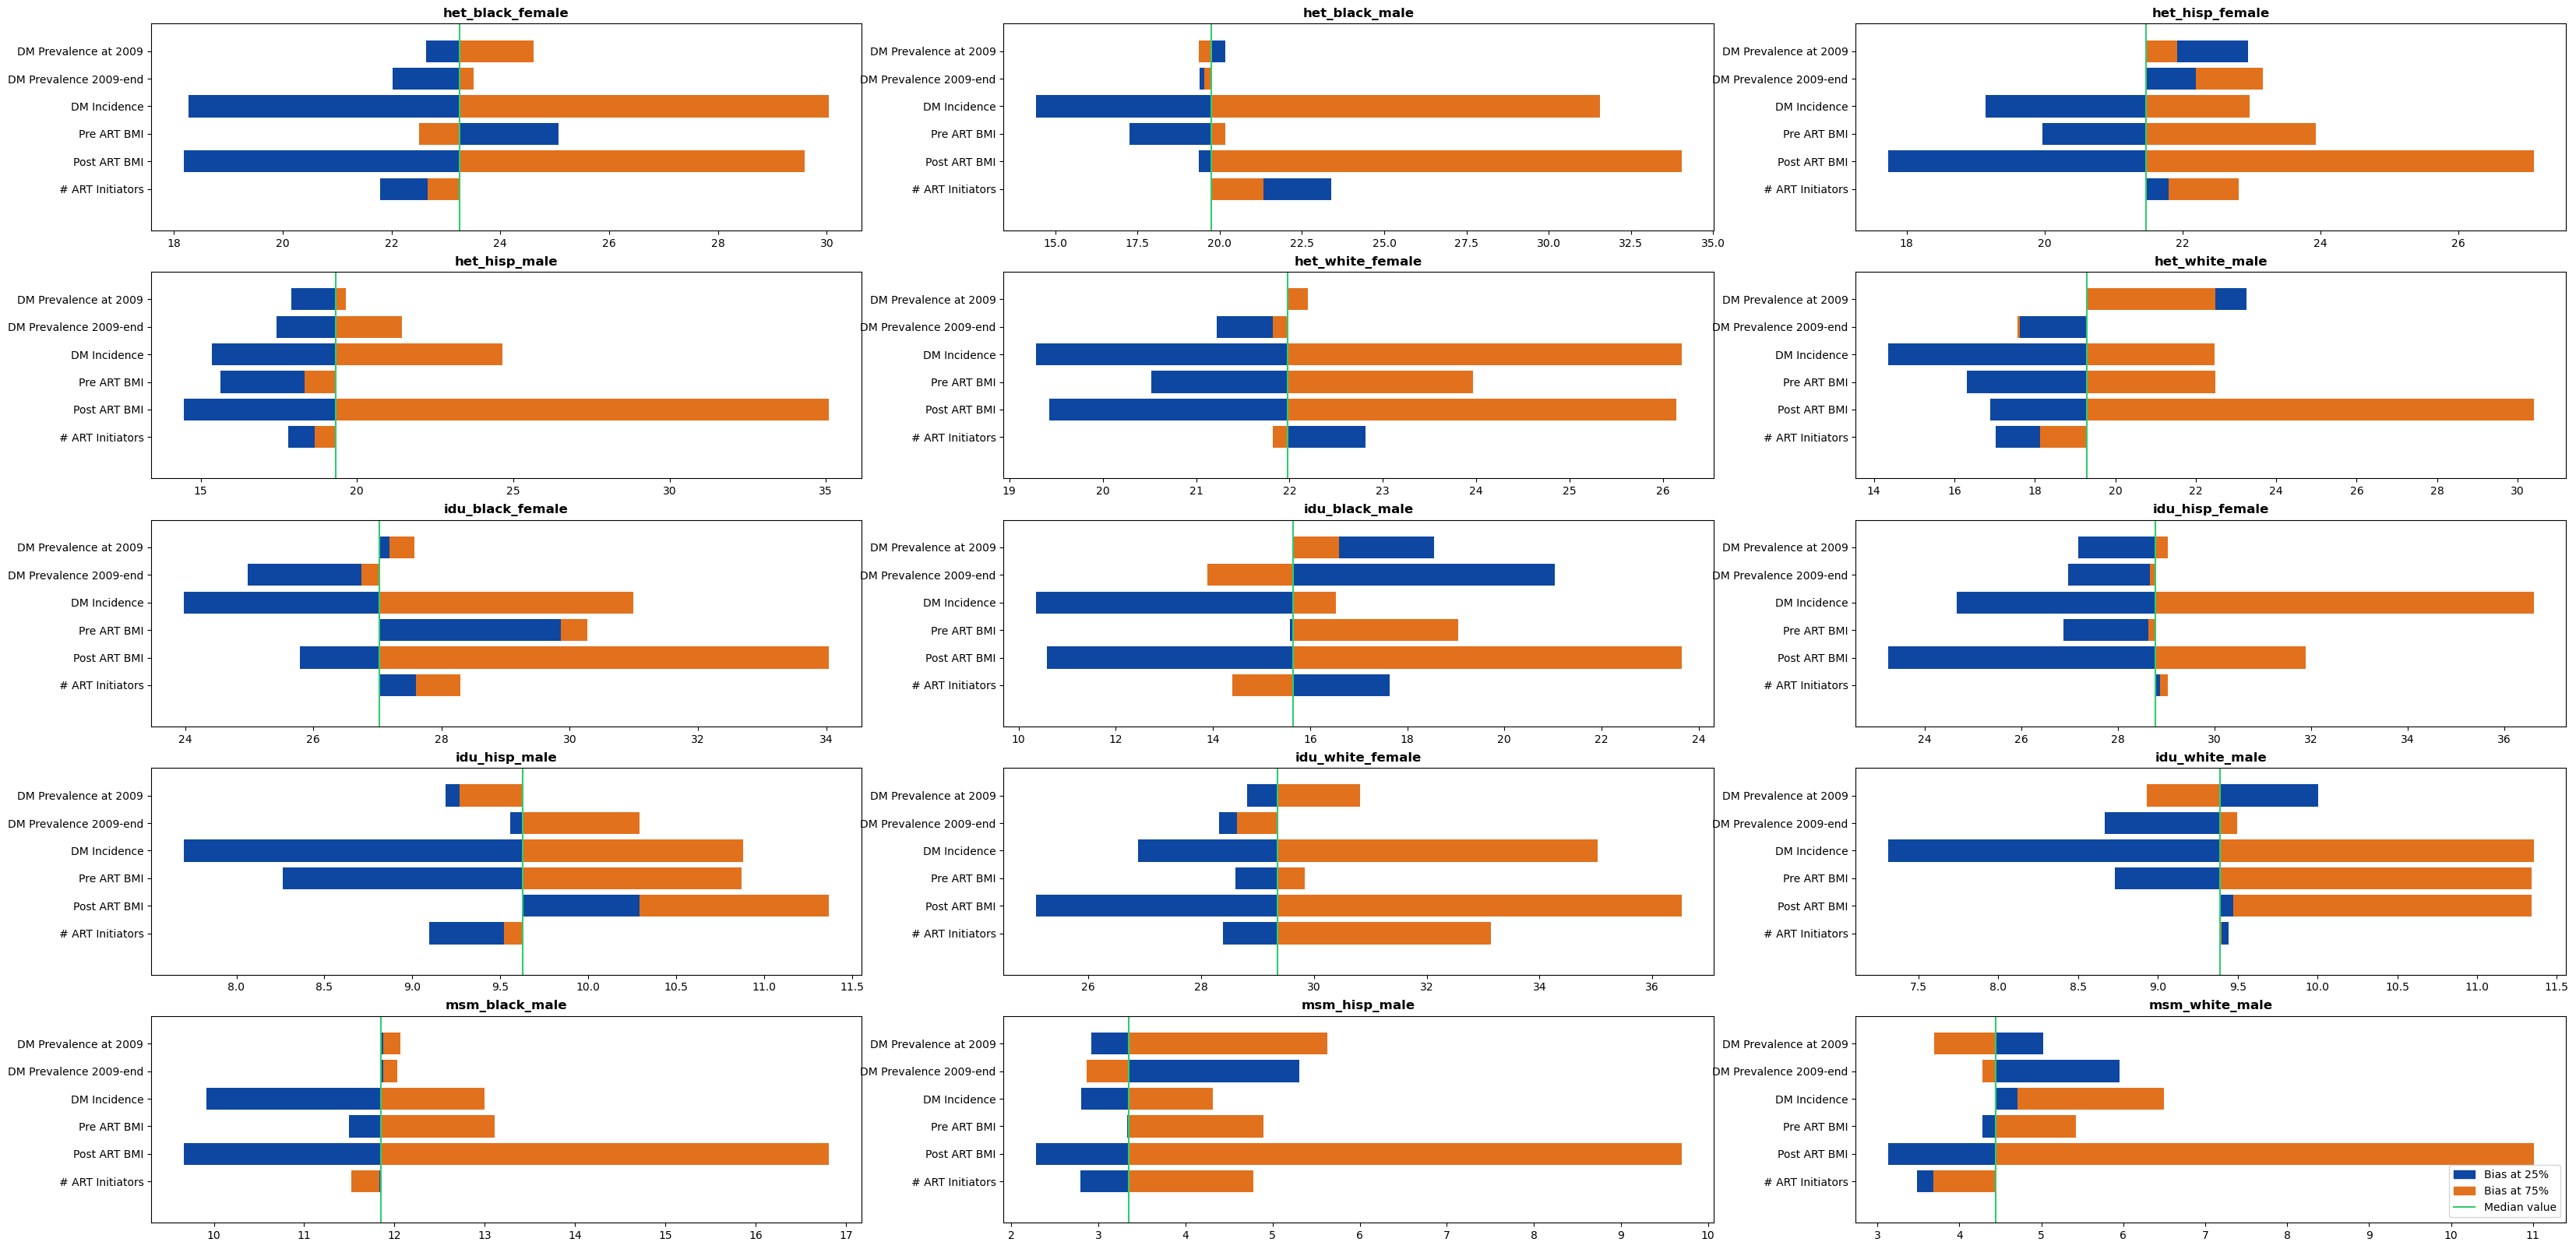

In [113]:
tornado_plot(baseline_tornado_vals, baseline_risk_sa_median)

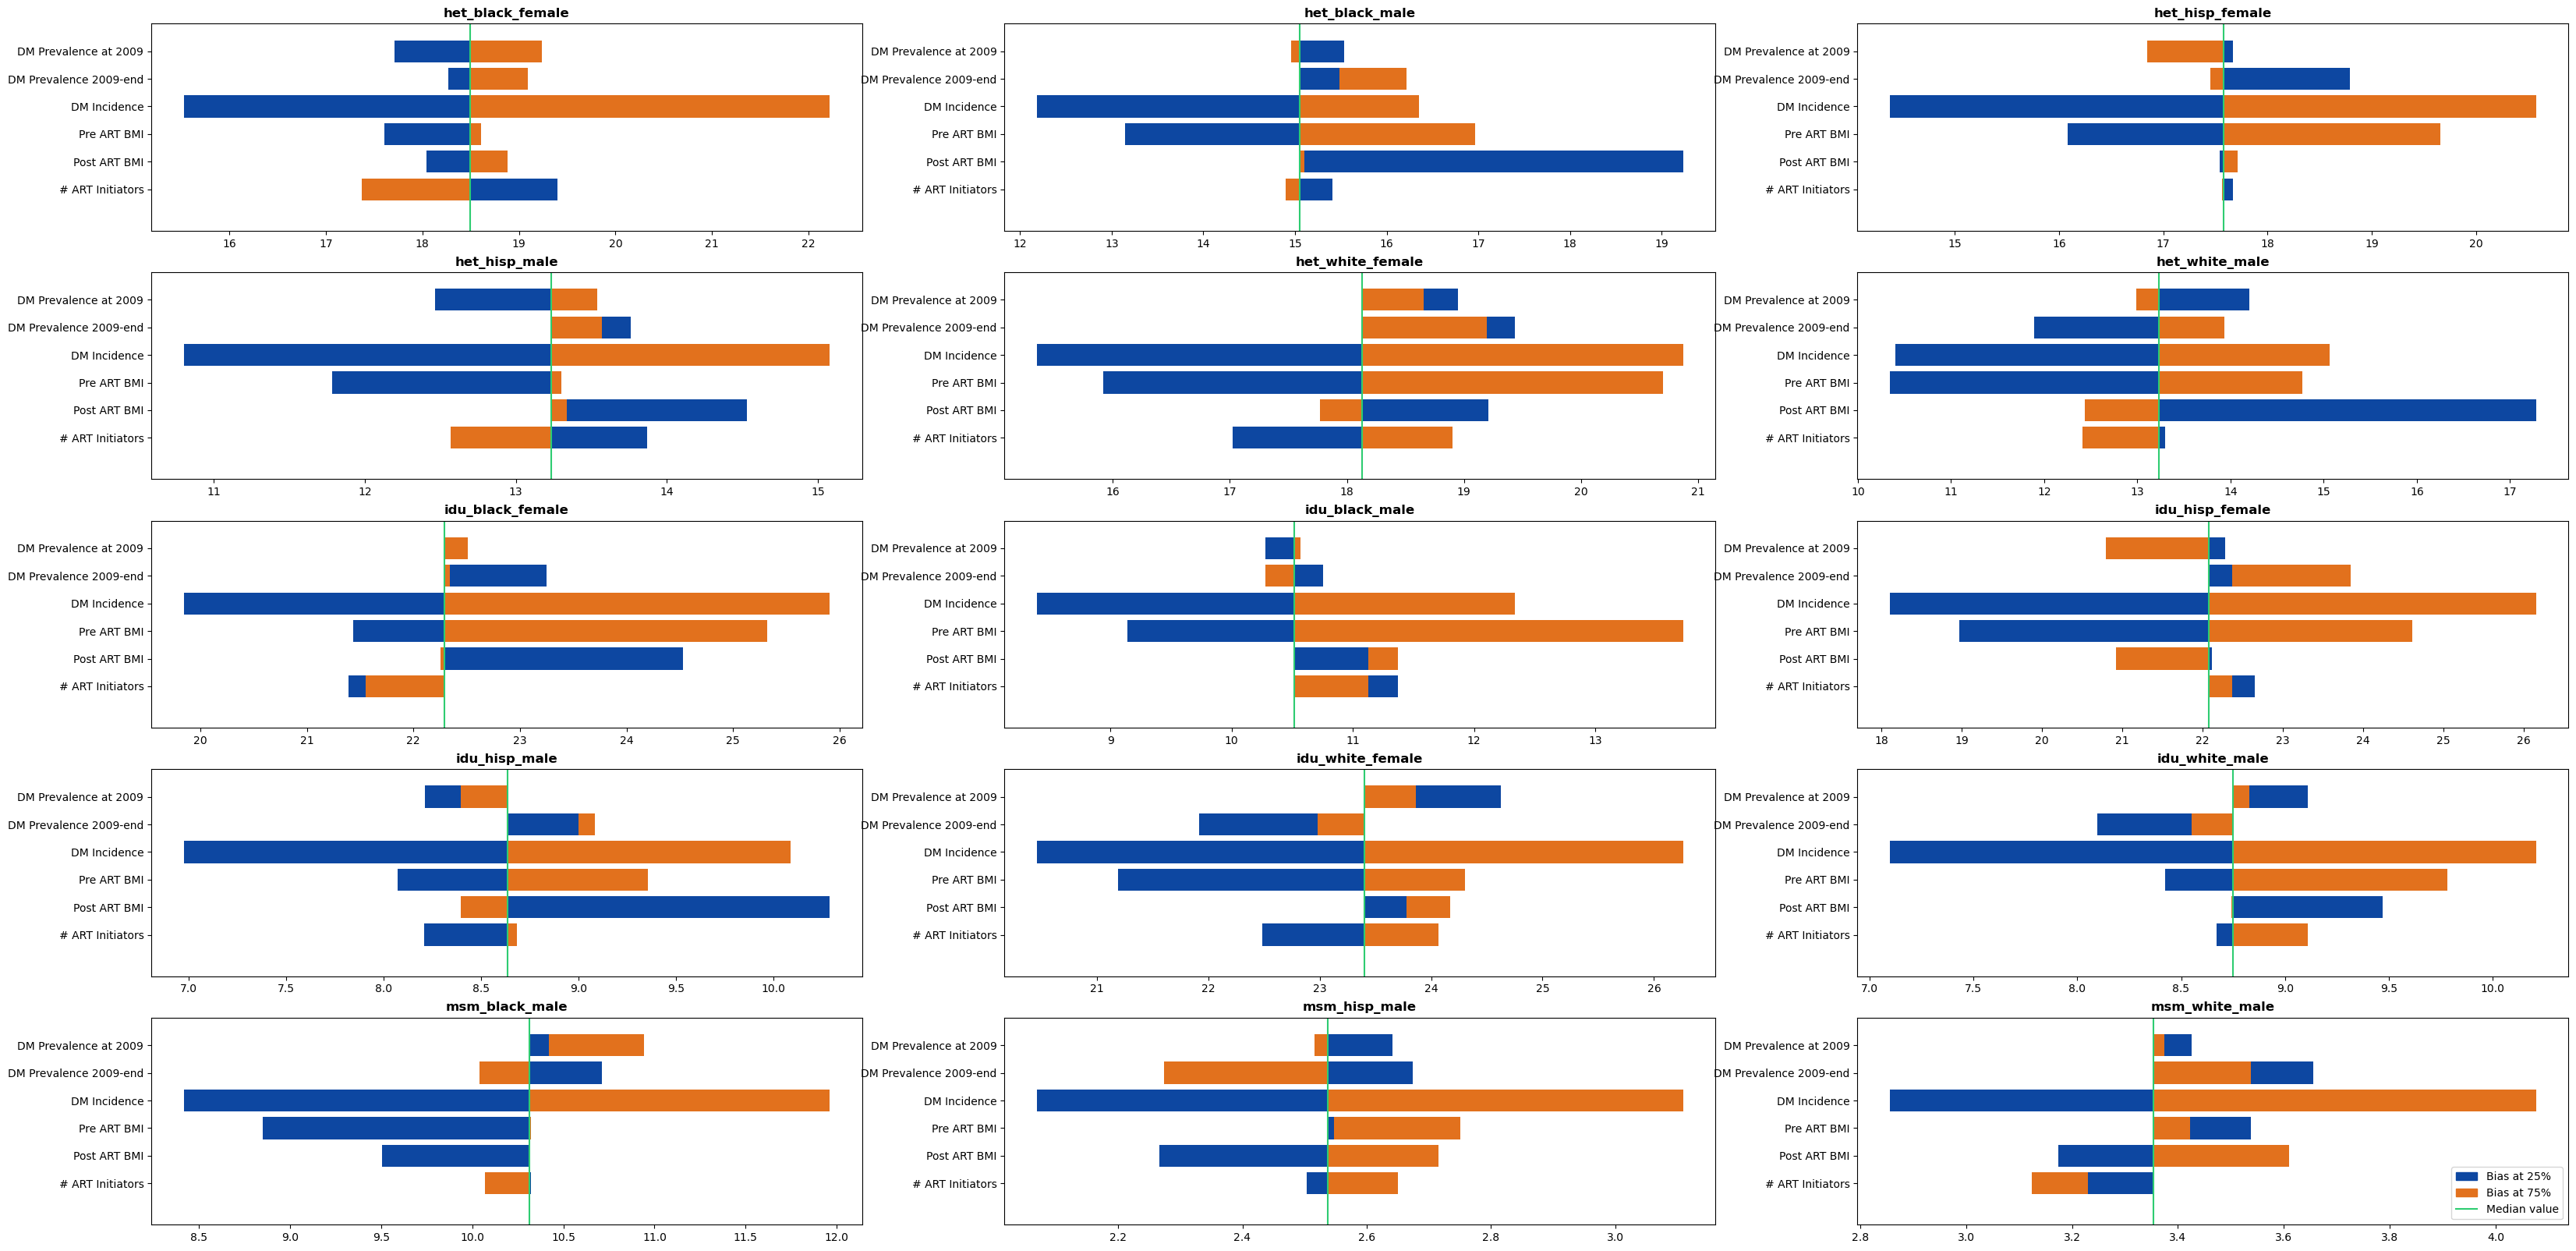

In [114]:
tornado_plot(variable_tornado_vals, variable_risk_sa_median)

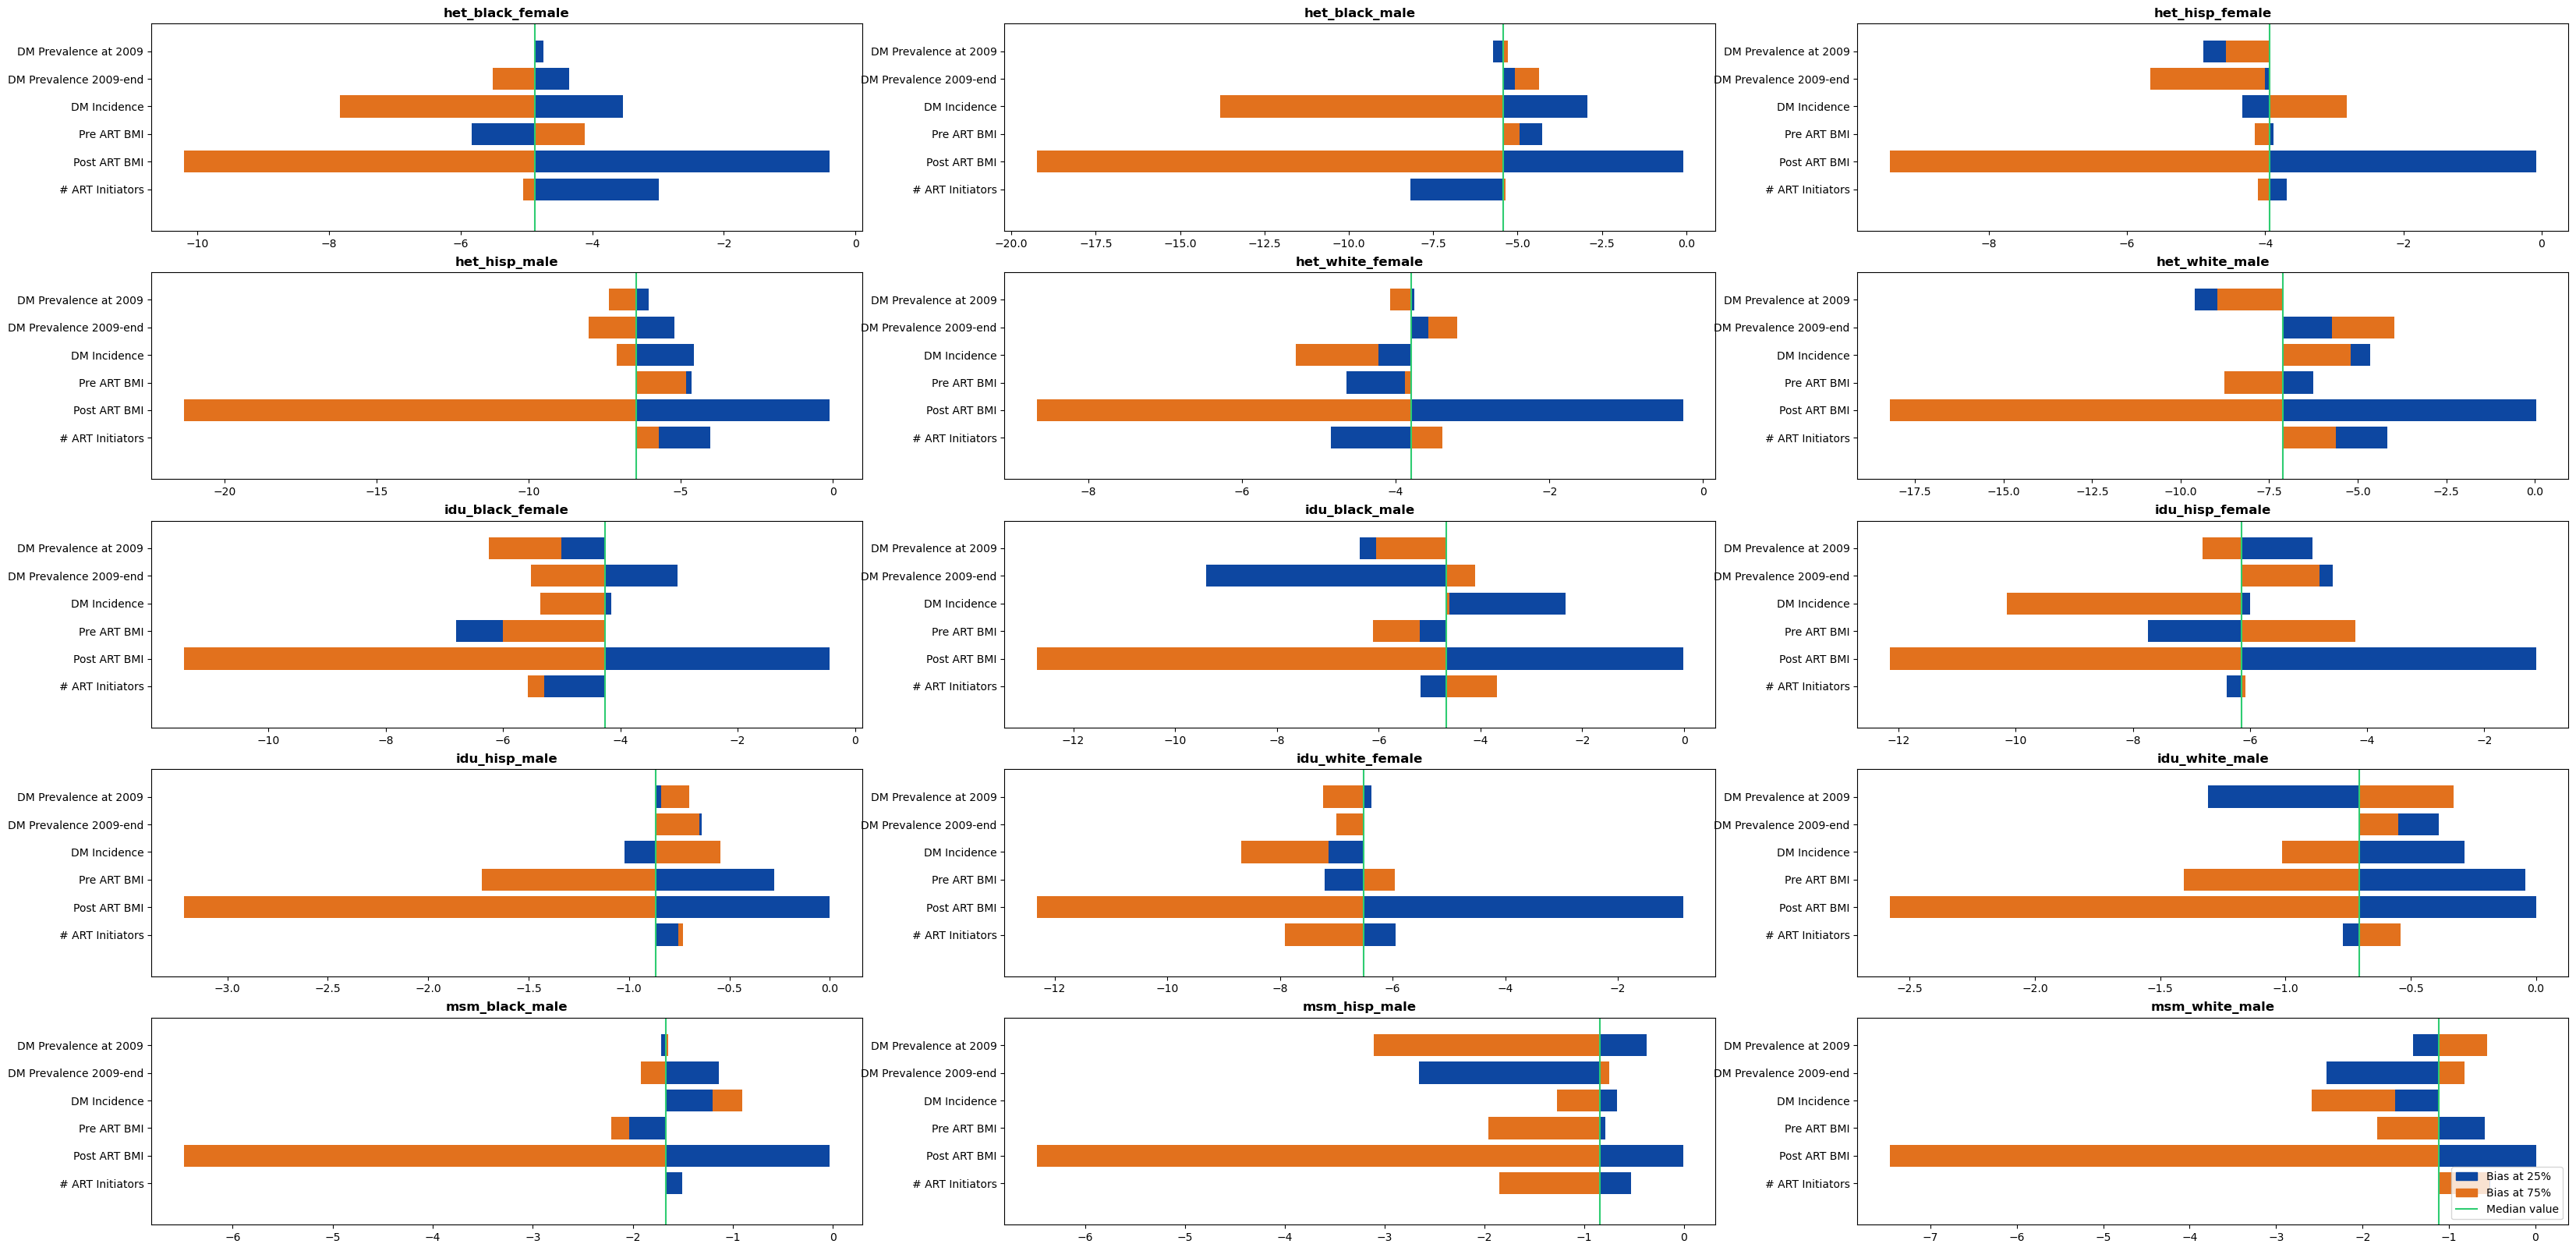

In [115]:
tornado_plot(difference_tornado_vals, baseline_risk_difference_df_sa)